In [24]:
#------------------------------------------------------------------------------
# IMPORTAMOS LAS LIBRERÍAS
#------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

#------------------------------------------------------------------------------
# CARGAMOS LOS DATOS
#------------------------------------------------------------------------------
pasajeros = pd.read_csv( "titanic.csv" )
pasajeros

,IdPasajero,Sobrevivió,Clase,Nombre,Sexo,Edad,Hermanos_familiares,Padres_hijos,Ticket,Tarifa,Cabina,Embarcado
0,1,0,3,"Braund, Mr. Owen Harris",hombre,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mujer,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",mujer,26.0,0,0,STON/O2. 3101282,7925.0000,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mujer,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",hombre,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",hombre,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",mujer,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",mujer,0.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",hombre,26.0,0,0,111369,30.0000,C148,C


SUPERVIVIENTES Y FALLECIDOS

In [25]:
superviviente = pasajeros[pasajeros["Sobrevivió"] == 1 ]
fallecido = pasajeros[pasajeros["Sobrevivió"] == 0 ]

Grafica: Supervivientes o Fallecidos

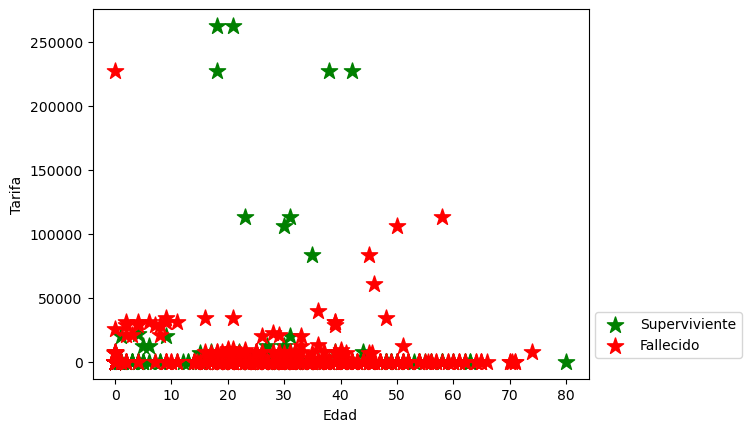

In [26]:
#------------------------------------------------------------------------------
# GENERAMOS LAS GRÁFICA ASOCIADA
#------------------------------------------------------------------------------
plt.scatter( superviviente[ "Edad" ], superviviente[ "Tarifa" ],
            marker = "*",
            s = 150,
            color = "green",
            label = "Superviviente")

plt.scatter( fallecido[ "Edad" ], fallecido[ "Tarifa" ],
            marker = "*",
            s = 150,
            color = "red",
            label = "Fallecido")

plt.ylabel( "Tarifa" )
plt.xlabel( "Edad" )
plt.legend( bbox_to_anchor = ( 1, 0.2 ) )
plt.show()

In [27]:

datos = pasajeros[ [ "Edad", "Tarifa" ] ]
datos= datos.dropna()
datos = datos.apply(pd.to_numeric)
clase = pasajeros[ "Sobrevivió" ]

escalador = preprocessing.MinMaxScaler()
datos = escalador.fit_transform(datos)


CREACION MODELO KNN

In [28]:
clasificador = KNeighborsClassifier(
    n_neighbors = 6,
    weights = "uniform",
    algorithm = "ball_tree",
    leaf_size = 100,
    p = 3,
    metric = "minkowski",
    n_jobs  = None
  )

clasificador.fit( datos, clase )

KNeighborsClassifier(algorithm='ball_tree', leaf_size=100, n_neighbors=6, p=3)

NUEVO PASAJERO

46
210691


c:\Users\dres\.conda\envs\Curso\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


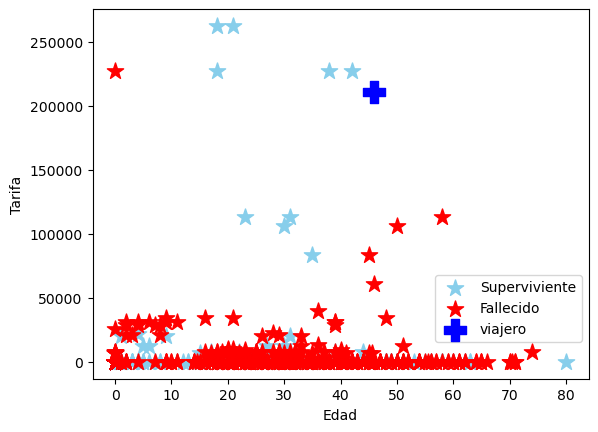

In [29]:
edad = random.randint( 5, 80 )
print (edad)
tarifa = random.randint(1000,300000)
print (tarifa)
viajero = escalador.transform( [ [ edad, tarifa ] ] )

plt.scatter( superviviente[ "Edad" ], superviviente[ "Tarifa" ],
             marker = "*",
             s = 150,
             color = "skyblue",
             label = "Superviviente"
           )
plt.scatter( fallecido[ "Edad" ], fallecido[ "Tarifa" ],
             marker = "*",
             s = 150,
             color = "red",
             label = "Fallecido"
           )
plt.scatter( edad, tarifa, marker = "P", s = 250, color = "blue", label = "viajero" )
plt.ylabel( "Tarifa" )
plt.xlabel( "Edad" )
plt.legend( bbox_to_anchor = ( 1, 0.3 ) )
plt.show()